In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [18]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [19]:
def rgb_to_grayscale(rgb_image):
    height, width, _ = rgb_image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_image[i, j] = gray_value

    return gray_image

In [20]:
print(os.getcwd())

/Users/jesusgalindo/Documents/Computer Vision/Raw-Computer-Vision


***Part 1***

Number of images: 10000
Number of labels: 10000


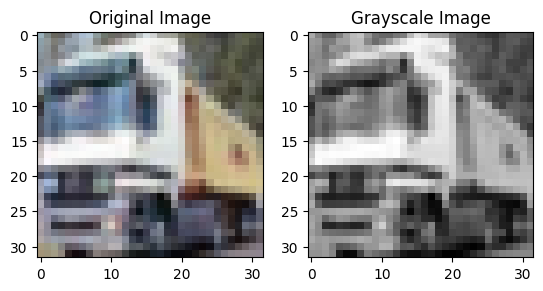

In [21]:
#path = "C:/Users/ramosv/Desktop/Vision/Raw-Computer-Vision/"
#cifar_data = unpickle(f'{path}cifar-10-batches-py/data_batch_1')
cifar_data = unpickle(f'cifar-10-batches-py/data_batch_1')

image_data = cifar_data[b'data']
labels = cifar_data[b'labels']

print("Number of images:", len(image_data))
print("Number of labels:", len(labels))

image_index = 1
first_image = image_data[image_index].reshape(3, 32, 32)

r = first_image[0, :, :]
g = first_image[1, :, :]
b = first_image[2, :, :]

rgb_image = np.stack([r, g, b], axis=2)

def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

gray_image = rgb_to_grayscale(rgb_image)

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.show()

Explaining the approach...

***Part 2***

In [22]:
## Add white gaussian noise to the grayscale image. Show the effects of the noise when
## the standard deviation is 1, 10 and 30 and 50.
def guassian_noise(image, mean=0, stddev=1):
    noise = np.random.normal(mean, stddev, image.shape)
    image_noise = image + noise
    image_noise = np.clip(image_noise, 0, 255)
    return image_noise


Text(0.5, 1.0, 'OG Grey Image')

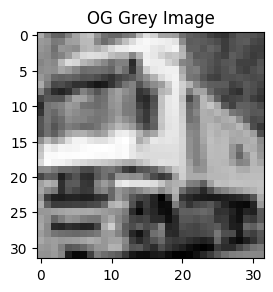

In [23]:
std_dev = [1, 10, 30, 50]
plt.figure(figsize=(10 , 10))
plt.subplot(3, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('OG Grey Image')


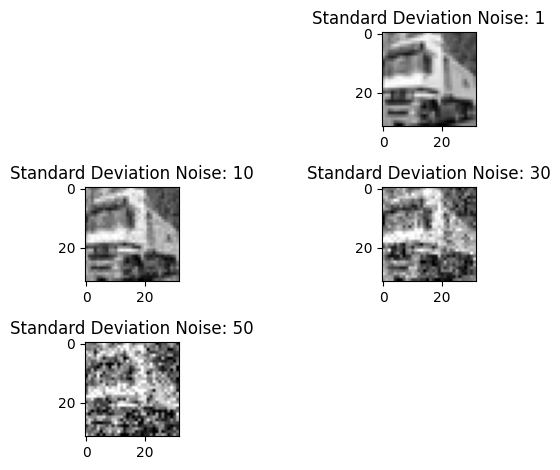

In [24]:
for i, std_dev in enumerate(std_dev):
    noisy = guassian_noise(gray_image, stddev=std_dev)
    plt.subplot(3, 2, i+2)
    plt.imshow(noisy, cmap='gray')
    plt.title(f'Standard Deviation Noise: {std_dev}')

plt.tight_layout()
plt.show()

***Part 3***
- Add Salt and Pepper noise to 10% and 30% of the pixels in the grayscale image in 1.
- Salt and Pepper noise is added to an image by adding random bright and random dark
- pixels all over the image.

In [25]:
def salt_pepper_noise(image, salt, pepper):
    noisy_image = np.copy(image)
    #print(image.shape)
    height, width = image.shape

    num_salt = np.ceil(salt * height * width)
    salt_cordinates = []

    for i in image.shape:
        salt_cordinates.append(np.random.randint(0, i, int(num_salt)))

    pepper_cordinates = []
    num_pepper = np.ceil(pepper * height * width)

    for i in image.shape:
        pepper_cordinates.append(np.random.randint(0, i, int(num_pepper)))

    # 255 is white
    noisy_image[salt_cordinates[0], salt_cordinates[1]] = 255

    # 0 is black
    noisy_image[pepper_cordinates[0], pepper_cordinates[1]] = 0

    return noisy_image


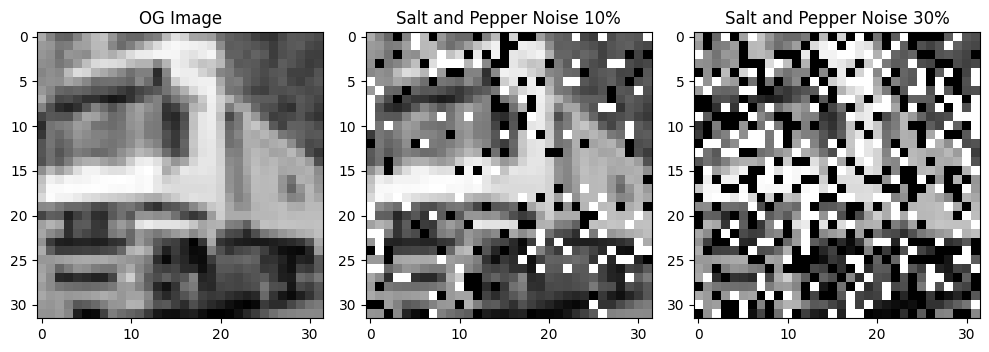

In [26]:
nosiy_image_10 = salt_pepper_noise(gray_image, 0.1,0.1)
noisy_image_30 = salt_pepper_noise(gray_image, 0.3,0.3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('OG Image')

plt.subplot(1, 3, 2)
plt.imshow(nosiy_image_10, cmap='gray')
plt.title('Salt and Pepper Noise 10%')

plt.subplot(1, 3, 3)
plt.imshow(noisy_image_30, cmap='gray')
plt.title('Salt and Pepper Noise 30%')

plt.tight_layout()
plt.show()



***Part 4***

In [27]:
def pad_image(image, pad_size=1):
    return np.pad(image, pad_size, mode='reflect')

In [28]:
def box_filter(image, kernel_size=3):
    padded_image = pad_image(image, pad_size=kernel_size//2)
    output_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.mean(neighborhood)

    return output_image


In [29]:
def median_filter(image, kernel_size=3):
    padded_image = pad_image(image, pad_size=kernel_size//2)
    output_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.median(neighborhood)

    return output_image

In [30]:
def guassian_filter(image, kernel_size=3, sigma=1):
    def guassian_kernel(size, sigma):
        ax = np.arange(-(size//2), (size//2) + 1)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-(xx**2 + yy**2) / (2.0 * (sigma**2)))
        return kernel / np.sum(kernel)

    kernel = guassian_kernel(kernel_size, sigma)
    padded_image = pad_image(image, pad_size=kernel_size//2)
    output_image = np.zeros_like(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.sum(neighborhood)

    return output_image


I started part 4


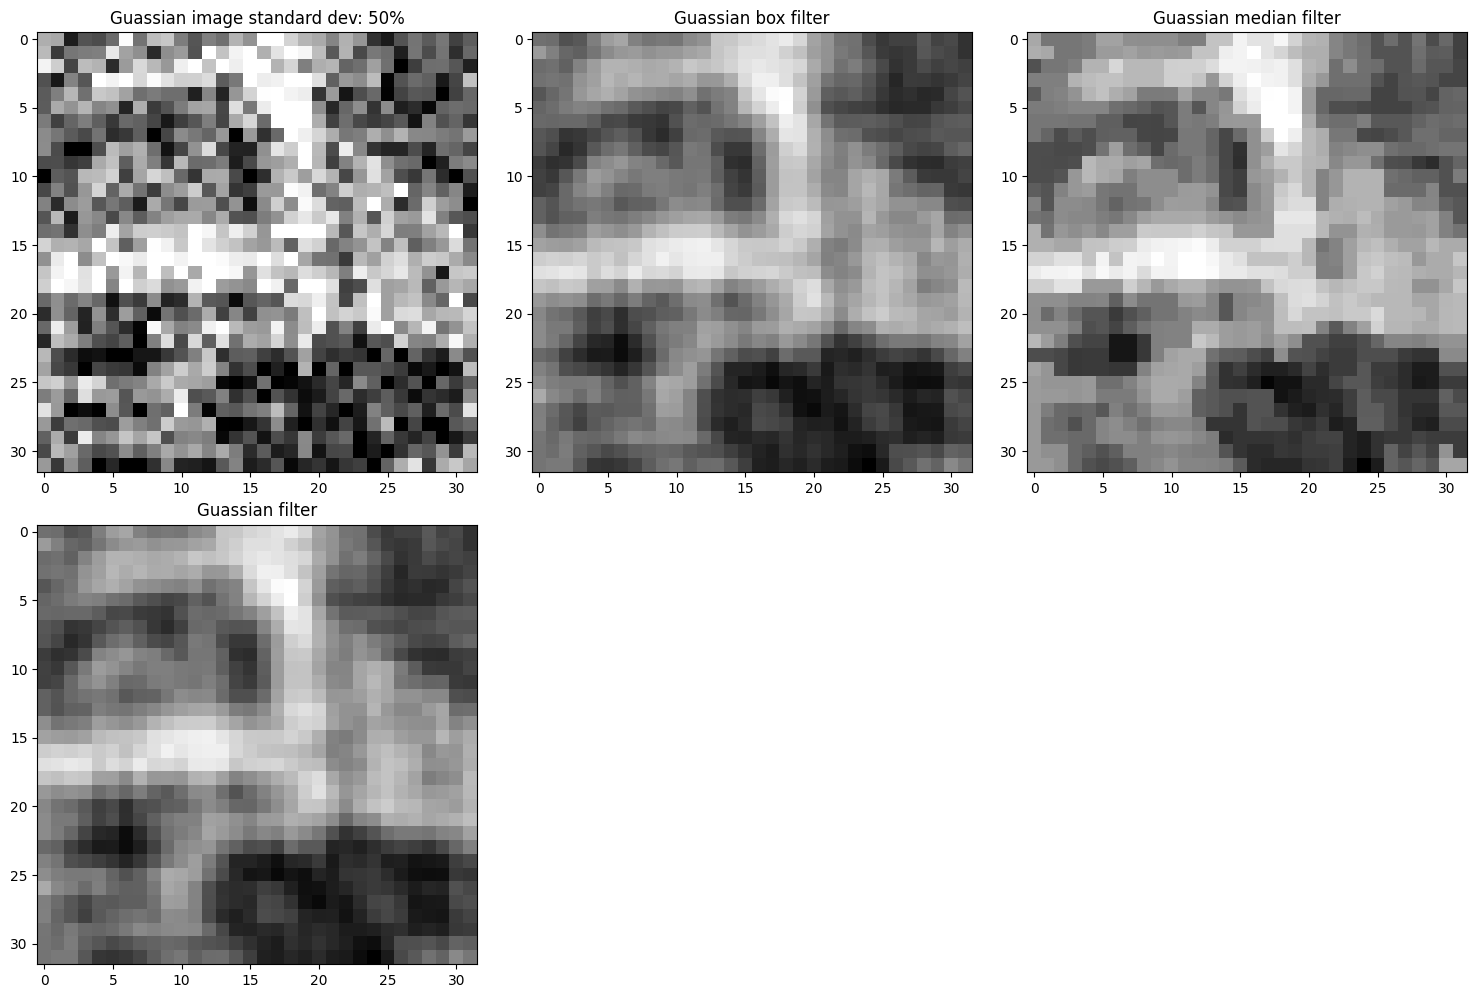

In [31]:
print('I started part 4')
noisy_guassian_image = guassian_noise(gray_image, stddev=50)
noisy_salt_pepper = salt_pepper_noise(gray_image, 0.3, 0.3)
box_filter_guassian = box_filter(noisy_guassian_image)
box_filter_salt_pepper = box_filter(noisy_salt_pepper)

median_filter_guassian = median_filter(noisy_guassian_image)
median_filter_salt_pepper = median_filter(noisy_salt_pepper)

guassian_filter_guassian = guassian_filter(noisy_guassian_image)
guassian_filter_salt_pepper = guassian_filter(noisy_salt_pepper)

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.imshow(noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(2,3,2)
plt.imshow(box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(2,3,3)
plt.imshow(median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(2,3,4)
plt.imshow(guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

plt.tight_layout()
plt.show()

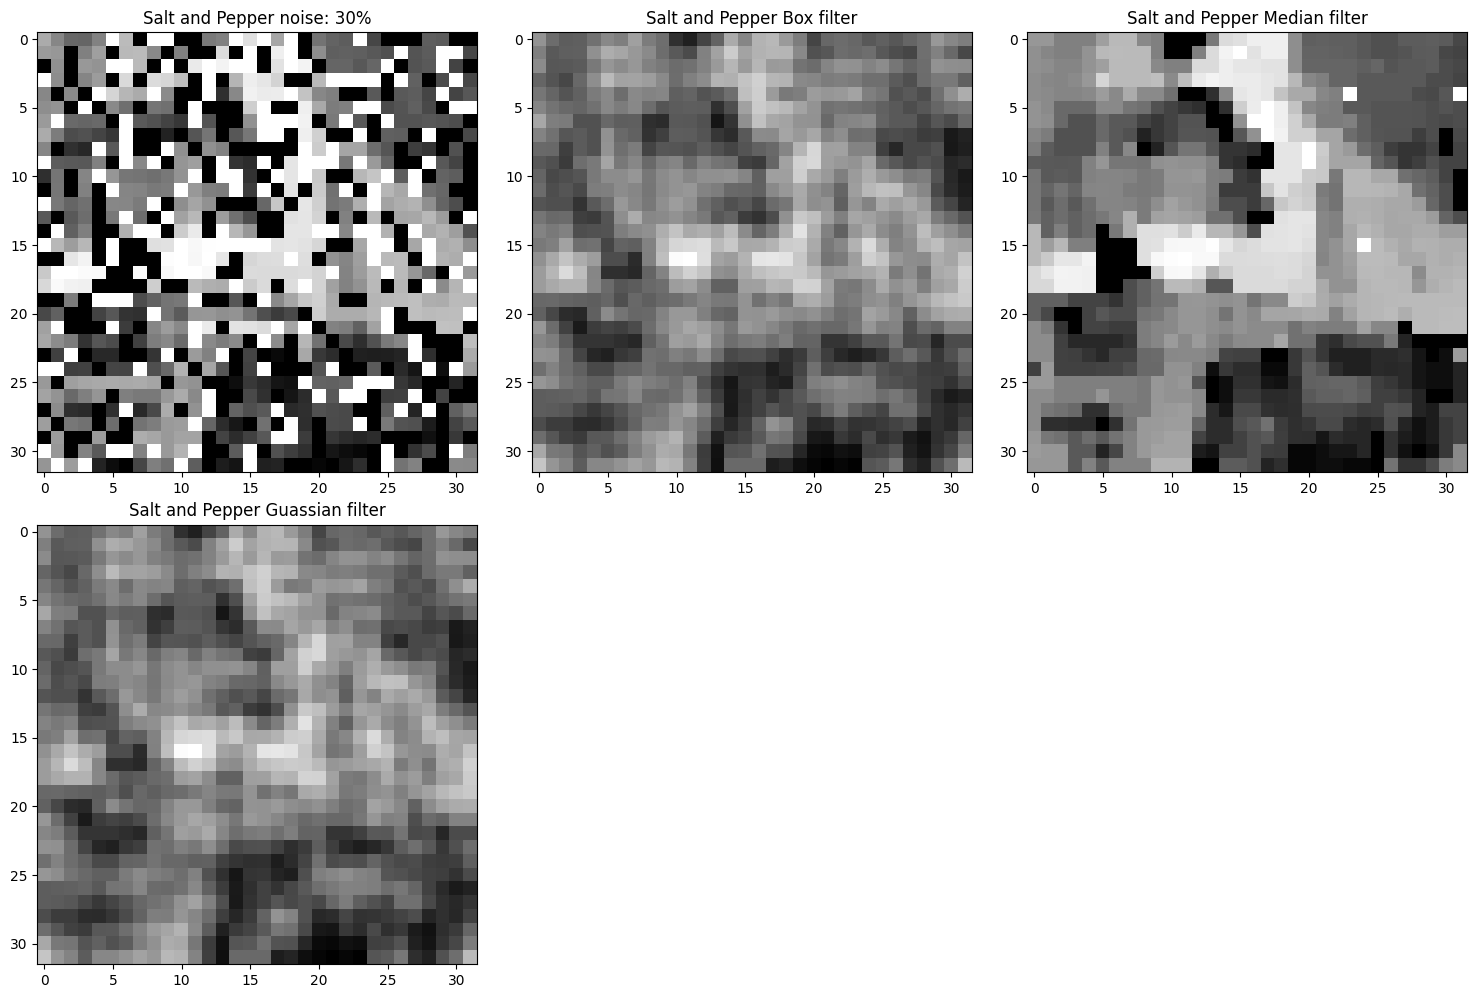

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(2,3,2)
plt.imshow(box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(2,3,3)
plt.imshow(median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(2,3,4)
plt.imshow(guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')

plt.tight_layout()
plt.show()